<a href="https://colab.research.google.com/github/AyaElsawyElghaysh/MachineLearningProject-/blob/master/StPySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 54.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=be3adc39ea70f1b4d45b4c3ff89a04ab8a14c14fa095f3b3de09ee2f74c899f3
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [120]:
from pyspark.sql import SparkSession
import  pyspark.sql.functions as fn

In [4]:
spark=SparkSession.builder.getOrCreate()

In [7]:
house_df=spark.read.parquet("/content/drive/MyDrive/Spark_data/data/parquet/2010-summary.parquet/sf-airbnb-clean.parquet")

In [8]:
house_df.printSchema()

root
 |-- host_is_superhost: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- host_total_listings_count: double (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- beds: double (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- minimum_nights: double (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- review_scores_accuracy: double (nullable = true)
 |-- review_scores_cleanliness: double (nullable = true)
 |-- review_scores_checkin: double (nullable = true)
 |-- review_scores_communication: double (nullable = true

In [10]:
house_df.dtypes

[('host_is_superhost', 'string'),
 ('cancellation_policy', 'string'),
 ('instant_bookable', 'string'),
 ('host_total_listings_count', 'double'),
 ('neighbourhood_cleansed', 'string'),
 ('latitude', 'double'),
 ('longitude', 'double'),
 ('property_type', 'string'),
 ('room_type', 'string'),
 ('accommodates', 'double'),
 ('bathrooms', 'double'),
 ('bedrooms', 'double'),
 ('beds', 'double'),
 ('bed_type', 'string'),
 ('minimum_nights', 'double'),
 ('number_of_reviews', 'double'),
 ('review_scores_rating', 'double'),
 ('review_scores_accuracy', 'double'),
 ('review_scores_cleanliness', 'double'),
 ('review_scores_checkin', 'double'),
 ('review_scores_communication', 'double'),
 ('review_scores_location', 'double'),
 ('review_scores_value', 'double'),
 ('price', 'double'),
 ('bedrooms_na', 'double'),
 ('bathrooms_na', 'double'),
 ('beds_na', 'double'),
 ('review_scores_rating_na', 'double'),
 ('review_scores_accuracy_na', 'double'),
 ('review_scores_cleanliness_na', 'double'),
 ('review_sco

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
house_df.describe().select("summary","price").show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              7146|
|   mean|213.30982367758187|
| stddev| 311.3754991591505|
|    min|              10.0|
|    max|           10000.0|
+-------+------------------+



In [117]:
price_df=house_df.select("price").toPandas()
price_df

,price
0,170.0
1,235.0
2,65.0
3,65.0
4,785.0
...,...
7141,163.0
7142,160.0
7143,249.0
7144,105.0


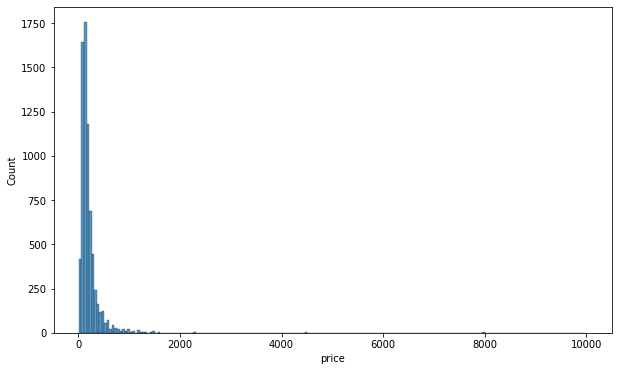

In [119]:
plt.figure(figsize=(10,6))
sns.histplot(price_df['price'],bins=200)
plt.show()


In [121]:
#we can take log to convert it from right skewness to normal
price_log=house_df.withColumn("logprice",fn.log(house_df["price"]))

In [125]:
price_log.printSchema()


root
 |-- host_is_superhost: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- host_total_listings_count: double (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- beds: double (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- minimum_nights: double (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- review_scores_accuracy: double (nullable = true)
 |-- review_scores_cleanliness: double (nullable = true)
 |-- review_scores_checkin: double (nullable = true)
 |-- review_scores_communication: double (nullable = true

In [129]:
new_price=price_log.select("logprice").toPandas()

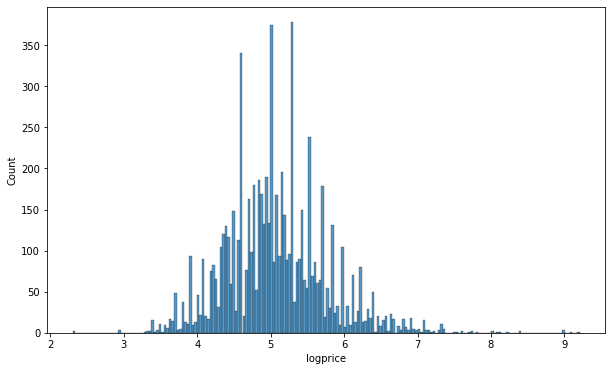

In [131]:
plt.figure(figsize=(10,6))
sns.histplot(new_price['logprice'],bins=200)
plt.show()

In [12]:
def choose_any_target(feature,target="price"):
  return house_df.select(feature,target).show()

In [41]:
choose_any_target("bedrooms")

+--------+-----+
|bedrooms|price|
+--------+-----+
|     1.0|170.0|
|     2.0|235.0|
|     1.0| 65.0|
|     1.0| 65.0|
|     2.0|785.0|
|     2.0|255.0|
|     1.0|139.0|
|     1.0|135.0|
|     2.0|265.0|
|     3.0|177.0|
|     3.0|194.0|
|     1.0|139.0|
|     1.0| 85.0|
|     1.0| 85.0|
|     1.0| 79.0|
|     2.0|136.0|
|     1.0|215.0|
|     2.0|450.0|
|     0.0|107.0|
|     1.0|110.0|
+--------+-----+
only showing top 20 rows



In [42]:
#we will apply linear regression model
#so we need to convert features to vector feature

SplitDataFrame

In [43]:
traindf,testdf=house_df.randomSplit([.8,.2],seed=42)

In [44]:
#vector assembler 
from pyspark.ml.feature import VectorAssembler

In [45]:
vecAssembler=VectorAssembler(inputCols=["bedrooms","bathrooms"],outputCol="features")
vec_train_df=vecAssembler.transform(traindf)

In [46]:
vec_train_df.printSchema()

root
 |-- host_is_superhost: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- host_total_listings_count: double (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- beds: double (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- minimum_nights: double (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- review_scores_accuracy: double (nullable = true)
 |-- review_scores_cleanliness: double (nullable = true)
 |-- review_scores_checkin: double (nullable = true)
 |-- review_scores_communication: double (nullable = true

In [97]:
vec_train_df.select("bedrooms","features","cancellation_policy","price").show()

+--------+---------+-------------------+-----+
|bedrooms| features|cancellation_policy|price|
+--------+---------+-------------------+-----+
|     1.0|[1.0,1.0]|           flexible|200.0|
|     1.0|[1.0,1.0]|           flexible|130.0|
|     1.0|[1.0,1.0]|           flexible| 95.0|
|     1.0|[1.0,1.0]|           flexible|250.0|
|     3.0|[3.0,3.0]|           flexible|250.0|
|     1.0|[1.0,1.0]|           flexible|115.0|
|     1.0|[1.0,1.5]|           flexible|105.0|
|     1.0|[1.0,1.0]|           flexible| 86.0|
|     1.0|[1.0,1.0]|           flexible|100.0|
|     2.0|[2.0,1.0]|           flexible|220.0|
|     1.0|[1.0,1.0]|           flexible|110.0|
|     1.0|[1.0,1.0]|           flexible|130.0|
|     1.0|[1.0,1.0]|           flexible|250.0|
|     1.0|[1.0,1.0]|           flexible|100.0|
|     3.0|[3.0,2.0]|           flexible|350.0|
|     2.0|[2.0,2.0]|           flexible|200.0|
|     1.0|[1.0,2.0]|           flexible|250.0|
|     2.0|[2.0,1.0]|           flexible|299.0|
|     1.0|[1.

In [48]:
#from the above cell we notice that bedrooms col id converted to vectorcols "features"

In [49]:
#if we selectmore cols input vecAssembler=VectorAssembler(inputCols=["bedrooms","bathrooms"],outputCol="features")
#vec_train_df=vecAssembler.transform(traindf)


In [50]:
#now model 
from pyspark.ml.regression import LinearRegression

In [51]:
lr=LinearRegression(featuresCol="features",labelCol="price",predictionCol="prediction")

In [52]:
lrmodel=lr.fit(vec_train_df) 

In [53]:
#we need apply the above vect on test data set

vec_test_df=vecAssembler.transform(testdf)

In [54]:
vec_test_df.select("bedrooms","bathrooms","price").show()

+--------+---------+------+
|bedrooms|bathrooms| price|
+--------+---------+------+
|     1.0|      1.0|  85.0|
|     1.0|      1.0|  45.0|
|     1.0|      1.0|  70.0|
|     1.0|      1.0| 128.0|
|     1.0|      1.0| 159.0|
|     2.0|      1.0| 250.0|
|     1.0|      1.0|  99.0|
|     1.0|      1.0|  95.0|
|     1.0|      1.0| 100.0|
|     1.0|      1.0|2010.0|
|     1.0|      1.0| 270.0|
|     2.0|      3.0| 500.0|
|     0.0|      1.0| 125.0|
|     3.0|      1.0| 210.0|
|     1.0|      1.5|  60.0|
|     3.0|      2.0| 170.0|
|     1.0|      1.0| 214.0|
|     1.0|      1.0| 120.0|
|     1.0|      2.0|  82.0|
|     3.0|      1.0| 169.0|
+--------+---------+------+
only showing top 20 rows



In [55]:
pred=lrmodel.transform(vec_test_df)

In [56]:
pred.printSchema()

root
 |-- host_is_superhost: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- host_total_listings_count: double (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- beds: double (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- minimum_nights: double (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- review_scores_accuracy: double (nullable = true)
 |-- review_scores_cleanliness: double (nullable = true)
 |-- review_scores_checkin: double (nullable = true)
 |-- review_scores_communication: double (nullable = true

In [58]:
pred.select("price","prediction").show()

+------+------------------+
| price|        prediction|
+------+------------------+
|  85.0|167.92639278679684|
|  45.0|167.92639278679684|
|  70.0|167.92639278679684|
| 128.0|167.92639278679684|
| 159.0|167.92639278679684|
| 250.0| 286.2297008427317|
|  99.0|167.92639278679684|
|  95.0|167.92639278679684|
| 100.0|167.92639278679684|
|2010.0|167.92639278679684|
| 270.0|167.92639278679684|
| 500.0|317.19255388614835|
| 125.0| 49.62308473086203|
| 210.0| 404.5330088986664|
|  60.0|175.66710604765103|
| 170.0| 420.0144354203748|
| 214.0|167.92639278679684|
| 120.0|167.92639278679684|
|  82.0|183.40781930850522|
| 169.0| 404.5330088986664|
+------+------------------+
only showing top 20 rows



PipeLine to perform operation easily instead of the above

In [60]:
vecAssembler=VectorAssembler(inputCols=["bedrooms","bathrooms"],outputCol="features")
lr=LinearRegression(featuresCol="features",labelCol="price",predictionCol="prediction")


In [59]:
from pyspark.ml.pipeline import Pipeline

In [61]:
pl=Pipeline(stages=[vecAssembler,lr])

In [62]:
pl_model=pl.fit(traindf)

In [63]:
prediction=pl_model.transform(testdf)

In [64]:
prediction.select("price","prediction").show()

+------+------------------+
| price|        prediction|
+------+------------------+
|  85.0|167.92639278679684|
|  45.0|167.92639278679684|
|  70.0|167.92639278679684|
| 128.0|167.92639278679684|
| 159.0|167.92639278679684|
| 250.0| 286.2297008427317|
|  99.0|167.92639278679684|
|  95.0|167.92639278679684|
| 100.0|167.92639278679684|
|2010.0|167.92639278679684|
| 270.0|167.92639278679684|
| 500.0|317.19255388614835|
| 125.0| 49.62308473086203|
| 210.0| 404.5330088986664|
|  60.0|175.66710604765103|
| 170.0| 420.0144354203748|
| 214.0|167.92639278679684|
| 120.0|167.92639278679684|
|  82.0|183.40781930850522|
| 169.0| 404.5330088986664|
+------+------------------+
only showing top 20 rows



In [65]:
dtypes=traindf.dtypes

In [68]:
dtypes

[('host_is_superhost', 'string'),
 ('cancellation_policy', 'string'),
 ('instant_bookable', 'string'),
 ('host_total_listings_count', 'double'),
 ('neighbourhood_cleansed', 'string'),
 ('latitude', 'double'),
 ('longitude', 'double'),
 ('property_type', 'string'),
 ('room_type', 'string'),
 ('accommodates', 'double'),
 ('bathrooms', 'double'),
 ('bedrooms', 'double'),
 ('beds', 'double'),
 ('bed_type', 'string'),
 ('minimum_nights', 'double'),
 ('number_of_reviews', 'double'),
 ('review_scores_rating', 'double'),
 ('review_scores_accuracy', 'double'),
 ('review_scores_cleanliness', 'double'),
 ('review_scores_checkin', 'double'),
 ('review_scores_communication', 'double'),
 ('review_scores_location', 'double'),
 ('review_scores_value', 'double'),
 ('price', 'double'),
 ('bedrooms_na', 'double'),
 ('bathrooms_na', 'double'),
 ('beds_na', 'double'),
 ('review_scores_rating_na', 'double'),
 ('review_scores_accuracy_na', 'double'),
 ('review_scores_cleanliness_na', 'double'),
 ('review_sco

In [86]:
num_dtype=[f for (f,d) in dtypes if (d=="double" and f !="price")]


In [87]:
num_dtype

['host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'bedrooms_na',
 'bathrooms_na',
 'beds_na',
 'review_scores_rating_na',
 'review_scores_accuracy_na',
 'review_scores_cleanliness_na',
 'review_scores_checkin_na',
 'review_scores_communication_na',
 'review_scores_location_na',
 'review_scores_value_na']

In [76]:
categorical_dtype=[f for (f,d) in dtypes if d=="string"]


In [77]:

categorical_dtype

['host_is_superhost',
 'cancellation_policy',
 'instant_bookable',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type']

In [ ]:
#any string datatype must to convert using StringIndxer then one hot encoding


In [91]:
from pyspark.ml.feature import  StringIndexer,VectorAssembler,OneHotEncoder

In [81]:
inx_out_cat_col=[f+"_index" for f in categorical_dtype]


In [82]:
inx_out_cat_col

['host_is_superhost_index',
 'cancellation_policy_index',
 'instant_bookable_index',
 'neighbourhood_cleansed_index',
 'property_type_index',
 'room_type_index',
 'bed_type_index']

In [88]:
#then onehotencoding
OHE_out_cat_col=[f+"_OHE" for f in categorical_dtype]

In [89]:
#take OHE_out_cat_col with numeric cols to be the final features
vector_col_input=num_dtype+OHE_out_cat_col

In [90]:
vector_col_input

['host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'bedrooms_na',
 'bathrooms_na',
 'beds_na',
 'review_scores_rating_na',
 'review_scores_accuracy_na',
 'review_scores_cleanliness_na',
 'review_scores_checkin_na',
 'review_scores_communication_na',
 'review_scores_location_na',
 'review_scores_value_na',
 'host_is_superhost_OHE',
 'cancellation_policy_OHE',
 'instant_bookable_OHE',
 'neighbourhood_cleansed_OHE',
 'property_type_OHE',
 'room_type_OHE',
 'bed_type_OHE']

In [92]:
SRITNG_INDEXER=StringIndexer(inputCols=categorical_dtype,outputCols=inx_out_cat_col,handleInvalid="skip")
ONE_HOT_ENCODIN=OneHotEncoder(inputCols=inx_out_cat_col,outputCols=OHE_out_cat_col )
VECTOR_ASSEMBLER=VectorAssembler(inputCols=vector_col_input,outputCol="features")

In [93]:
lr=LinearRegression(featuresCol="features",labelCol="price",predictionCol="prediction")


In [94]:
myStages=[SRITNG_INDEXER,ONE_HOT_ENCODIN,VECTOR_ASSEMBLER,lr]
pl=Pipeline(stages=myStages)
pl_model=pl.fit(traindf)

In [95]:
pred_df=pl_model.transform(testdf)

In [96]:
pred_df.printSchema()

root
 |-- host_is_superhost: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- host_total_listings_count: double (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- beds: double (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- minimum_nights: double (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- review_scores_accuracy: double (nullable = true)
 |-- review_scores_cleanliness: double (nullable = true)
 |-- review_scores_checkin: double (nullable = true)
 |-- review_scores_communication: double (nullable = true

In [98]:
pred_df.select("room_type_OHE","bed_type_OHE","property_type_OHE","features").show()

+-------------+-------------+-----------------+--------------------+
|room_type_OHE| bed_type_OHE|property_type_OHE|            features|
+-------------+-------------+-----------------+--------------------+
|(2,[0],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[1],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[1],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[1],[1.0])|(4,[0],[1.0])|   (24,[0],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[1],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[0],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[0],[1.0])|(4,[0],[1.0])|   (24,[0],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[0],[1.0])|(4,[0],[1.0])|   (24,[0],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[1],[1.0])|(4,[0],[1.0])|   (24,[0],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[0],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[0],[1.0])|(4,[0],[1.0])|   (24,[1],[1.0])|(98,[0,1,2,3,4,5,...|
|(2,[0],[1.0])|(4,[0],[1.0])|   (2

In [99]:
pred_df.select("price","prediction").show()

+------+------------------+
| price|        prediction|
+------+------------------+
|  85.0|55.195630555236676|
|  45.0| 22.27839420925011|
|  70.0| 26.68714705913044|
| 128.0|-91.85797325820567|
| 159.0| 94.35651802111897|
| 250.0|   262.90699830428|
|  99.0|152.47252897306498|
|  95.0| 180.8137666634466|
| 100.0|-52.45553844139067|
|2010.0| 260.7058365633957|
| 270.0|165.60402191550565|
| 500.0| 377.6569982400006|
| 125.0|  78.3505358526736|
| 210.0|361.87158651966365|
|  60.0|106.82934331114575|
| 170.0| 401.9117809044046|
| 214.0|232.82216499633614|
| 120.0|128.88821141215612|
|  82.0|108.63538872166282|
| 169.0| 370.2770565220544|
+------+------------------+
only showing top 20 rows



In [101]:
from pyspark.ml.evaluation import RegressionEvaluator

In [102]:
re_eval=RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="rmse")

In [103]:
re_eval.evaluate(pred_df)

220.69792737308603

In [105]:
testdf.describe().select("summary","price").show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              1366|
|   mean|208.39019033674964|
| stddev|240.72061386663594|
|    min|              28.0|
|    max|            4500.0|
+-------+------------------+



In [109]:
re_eval=RegressionEvaluator(predictionCol="prediction",labelCol="price",metricName="r2")

In [112]:
print(re_eval.evaluate(pred_df))
testdf.describe().select("summary","price").show()

0.15940731238114536
+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|              1366|
|   mean|208.39019033674964|
| stddev|240.72061386663594|
|    min|              28.0|
|    max|            4500.0|
+-------+------------------+

